In [1]:
import networkx as nx

G = nx.grid_2d_graph(20, 20)

In [9]:
# pos = nx.layout.circular_layout(G)

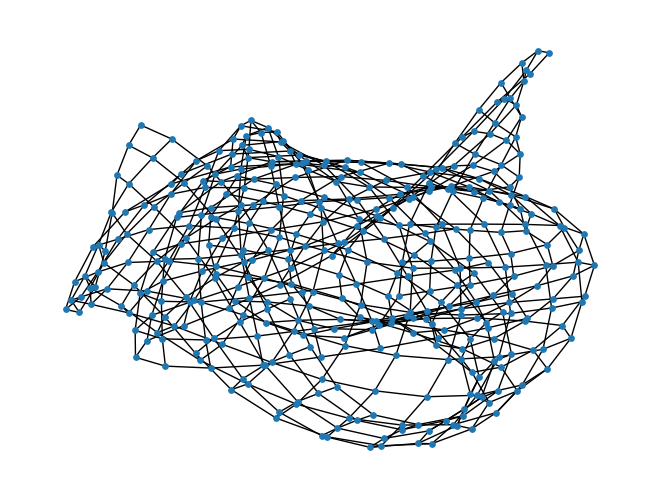

In [2]:
nx.draw(G, with_labels=False, node_size=15, font_weight="light", font_color="blue", font_size=9)

#### Функция которая рисует изменения на графе

In [3]:
import matplotlib.pyplot as plt

def draw_state(G, state):
    plt.clf()
    pos = dict(zip(G.nodes(), G.nodes()))
    colors = ['red' if state[node]==0 else 'green' for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=200)
    nx.draw_networkx_edges(G, pos, alpha=0.2)
    plt.axis('off')
    plt.show()

#### Изначальный граф заполненный от 0 до 1 случайно
- Зеленый (клетка живая)
- Красный (клетка мертва)

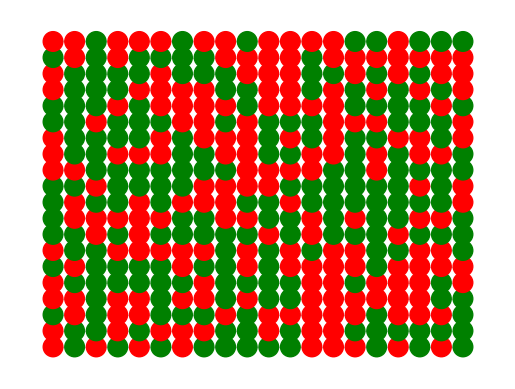

In [7]:
import random

state = {node: random.randint(0, 1) for node in G.nodes()}
draw_state(G, state)

#### Алгоритм игры
- Если клетка пуста и рядом с ней ровно три живые клетки, она становится живой.
- Если клетка живая и рядом с ней меньше двух или больше трех живых клеток, она умирает.
- Если клетка живая и рядом с ней две или три живые клетки, она остается живой.

In [9]:
def update_state(G, state):
    new_state = state.copy()
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        n_alive = sum(state[neighbor] for neighbor in neighbors)
        if state[node] == 1:
            if n_alive < 2 or n_alive > 3:
                new_state[node] = 0
        else:
            if n_alive == 3:
                new_state[node] = 1
    return new_state

## Рандомно заполненный граф

{(0, 0): 0, (0, 1): 0, (0, 2): 1, (0, 3): 1, (0, 4): 1, (0, 5): 0, (0, 6): 1, (0, 7): 0, (0, 8): 1, (0, 9): 0, (0, 10): 0, (0, 11): 1, (0, 12): 0, (0, 13): 1, (0, 14): 0, (0, 15): 1, (0, 16): 1, (0, 17): 1, (0, 18): 0, (0, 19): 0, (1, 0): 1, (1, 1): 1, (1, 2): 0, (1, 3): 1, (1, 4): 0, (1, 5): 1, (1, 6): 0, (1, 7): 1, (1, 8): 0, (1, 9): 1, (1, 10): 0, (1, 11): 0, (1, 12): 1, (1, 13): 0, (1, 14): 1, (1, 15): 1, (1, 16): 1, (1, 17): 0, (1, 18): 0, (1, 19): 1, (2, 0): 0, (2, 1): 0, (2, 2): 1, (2, 3): 0, (2, 4): 0, (2, 5): 1, (2, 6): 1, (2, 7): 1, (2, 8): 1, (2, 9): 1, (2, 10): 0, (2, 11): 1, (2, 12): 0, (2, 13): 0, (2, 14): 1, (2, 15): 1, (2, 16): 0, (2, 17): 1, (2, 18): 1, (2, 19): 1, (3, 0): 0, (3, 1): 0, (3, 2): 1, (3, 3): 0, (3, 4): 1, (3, 5): 0, (3, 6): 0, (3, 7): 0, (3, 8): 1, (3, 9): 0, (3, 10): 0, (3, 11): 1, (3, 12): 0, (3, 13): 1, (3, 14): 0, (3, 15): 1, (3, 16): 0, (3, 17): 0, (3, 18): 1, (3, 19): 0, (4, 0): 0, (4, 1): 0, (4, 2): 0, (4, 3): 0, (4, 4): 0, (4, 5): 1, (4, 6): 0, (4

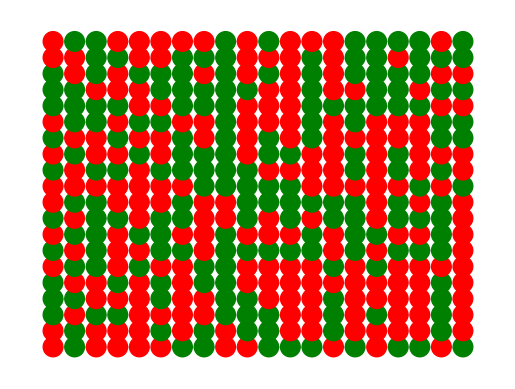

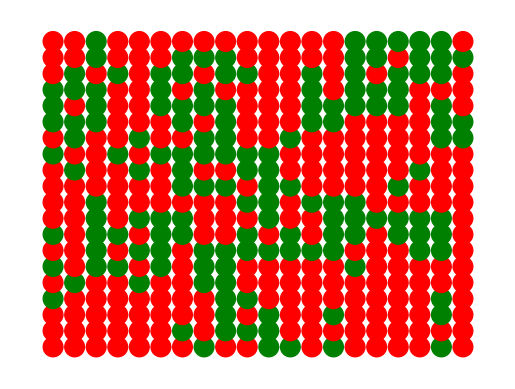

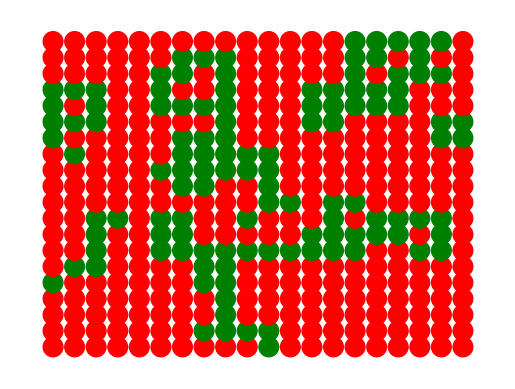

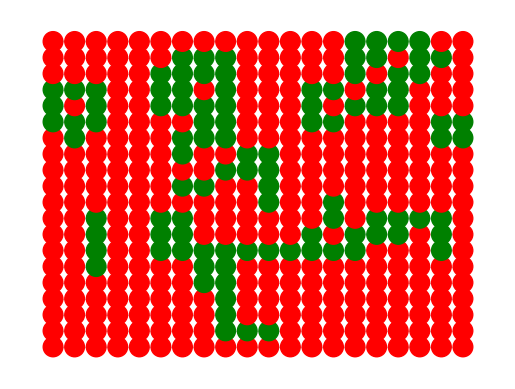

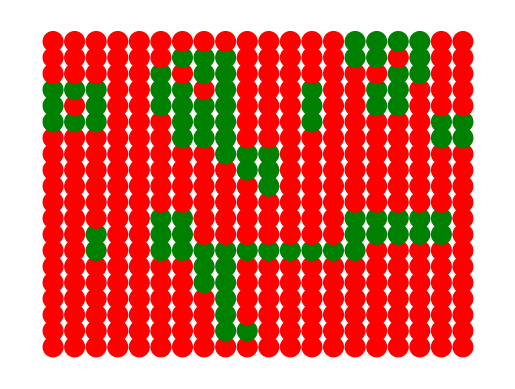

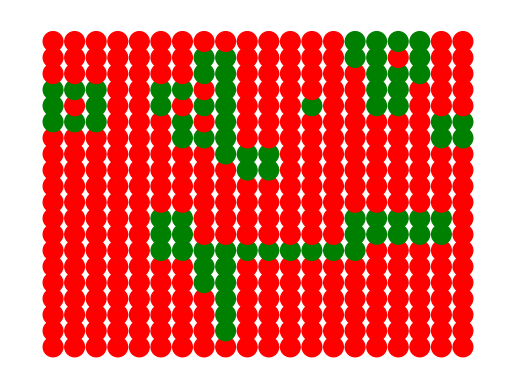

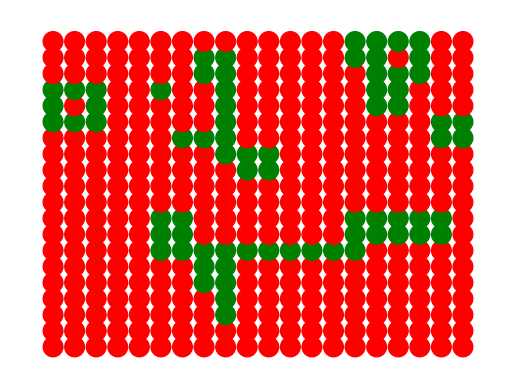

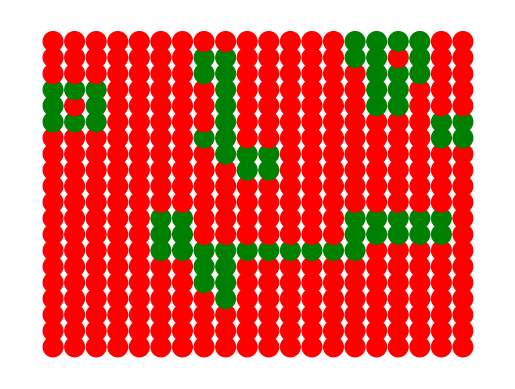

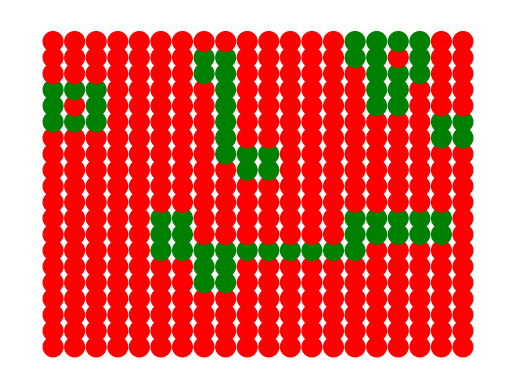

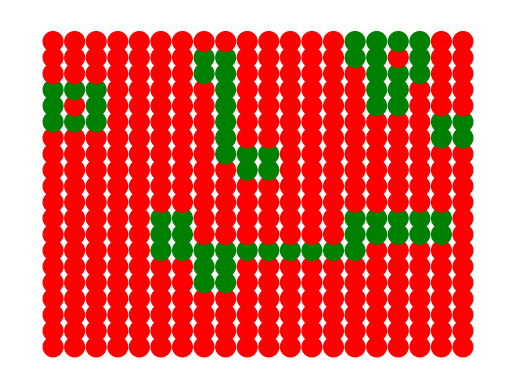

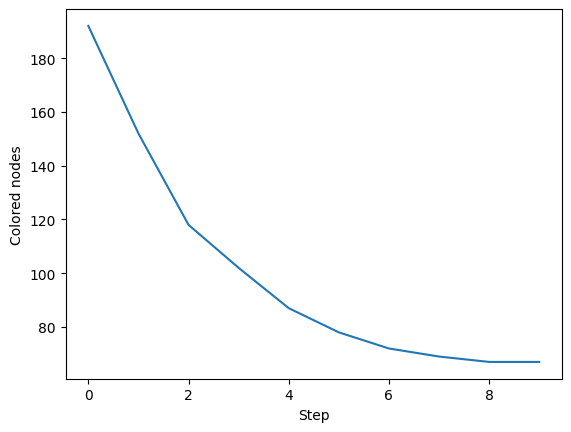

In [63]:
import matplotlib.pyplot as plt
import random

def count_colored_nodes(G, state):
    return sum(state[node] for node in G.nodes())

def plot_colored_nodes(counts):
    plt.plot(counts)
    plt.xlabel('Step')
    plt.ylabel('Colored nodes')
    plt.show()

counts = []
# state = {node: random.randint(0, 1) for node in G.nodes()}
# print(state)

for i in range(10):
    draw_state(G, state)
    counts.append(count_colored_nodes(G, state))
    state = update_state(G, state)
plot_colored_nodes(counts)

## Пример на графе, который заполнен 0, 1, 0, 1..

{(0, 0): 0, (0, 1): 1, (0, 2): 0, (0, 3): 1, (0, 4): 0, (0, 5): 1, (0, 6): 0, (0, 7): 1, (0, 8): 0, (0, 9): 1, (0, 10): 0, (0, 11): 1, (0, 12): 0, (0, 13): 1, (0, 14): 0, (0, 15): 1, (0, 16): 0, (0, 17): 1, (0, 18): 0, (0, 19): 1, (1, 0): 0, (1, 1): 1, (1, 2): 0, (1, 3): 1, (1, 4): 0, (1, 5): 1, (1, 6): 0, (1, 7): 1, (1, 8): 0, (1, 9): 1, (1, 10): 0, (1, 11): 1, (1, 12): 0, (1, 13): 1, (1, 14): 0, (1, 15): 1, (1, 16): 0, (1, 17): 1, (1, 18): 0, (1, 19): 1, (2, 0): 0, (2, 1): 1, (2, 2): 0, (2, 3): 1, (2, 4): 0, (2, 5): 1, (2, 6): 0, (2, 7): 1, (2, 8): 0, (2, 9): 1, (2, 10): 0, (2, 11): 1, (2, 12): 0, (2, 13): 1, (2, 14): 0, (2, 15): 1, (2, 16): 0, (2, 17): 1, (2, 18): 0, (2, 19): 1, (3, 0): 0, (3, 1): 1, (3, 2): 0, (3, 3): 1, (3, 4): 0, (3, 5): 1, (3, 6): 0, (3, 7): 1, (3, 8): 0, (3, 9): 1, (3, 10): 0, (3, 11): 1, (3, 12): 0, (3, 13): 1, (3, 14): 0, (3, 15): 1, (3, 16): 0, (3, 17): 1, (3, 18): 0, (3, 19): 1, (4, 0): 0, (4, 1): 1, (4, 2): 0, (4, 3): 1, (4, 4): 0, (4, 5): 1, (4, 6): 0, (4

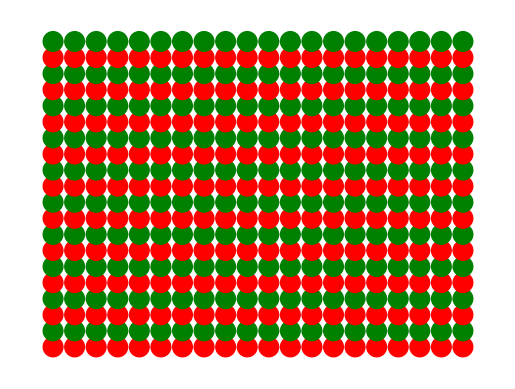

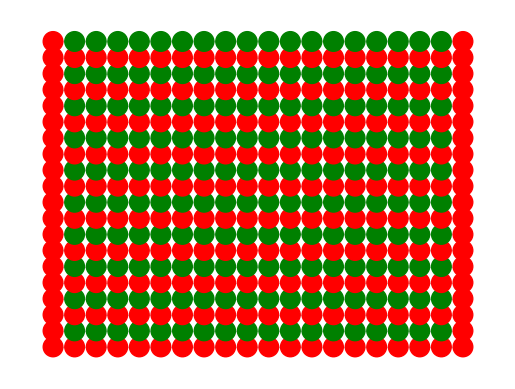

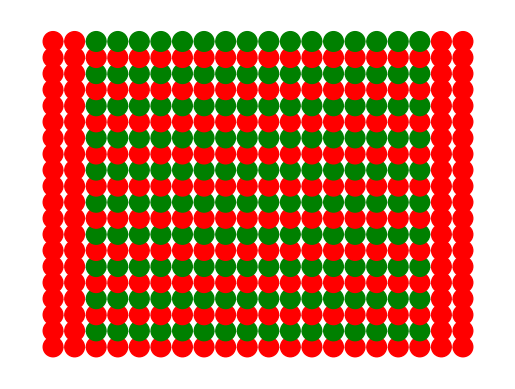

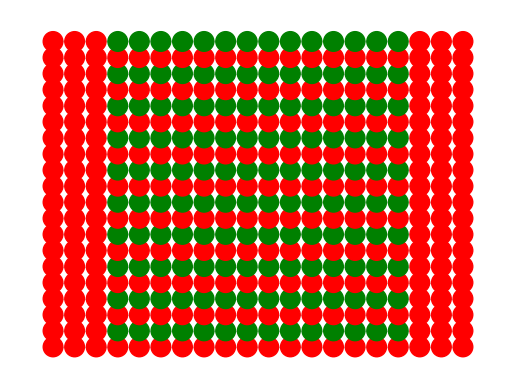

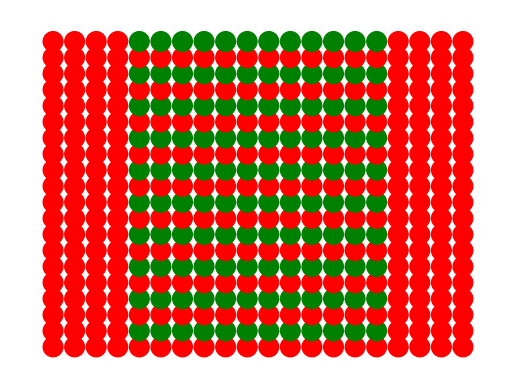

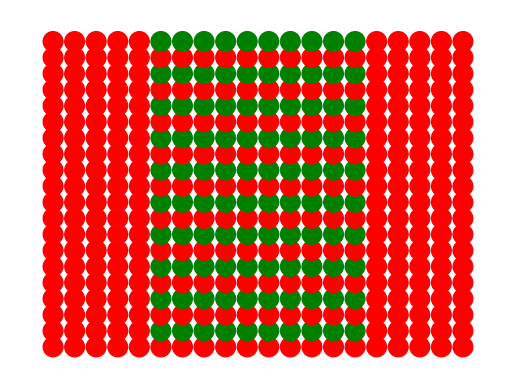

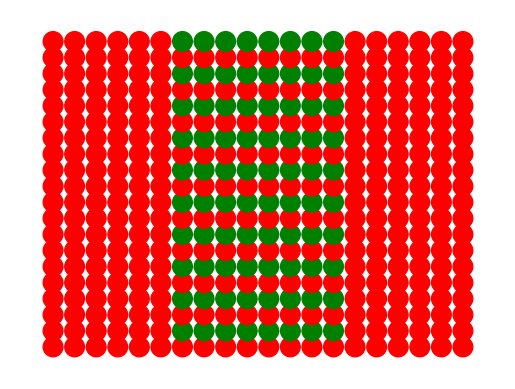

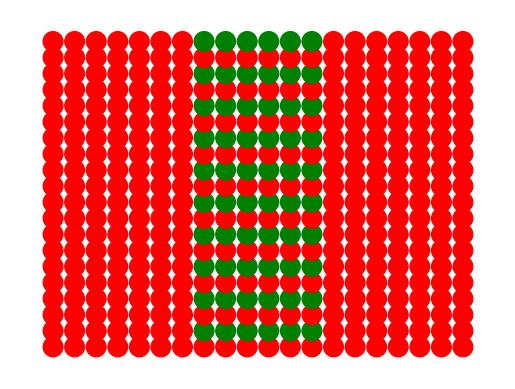

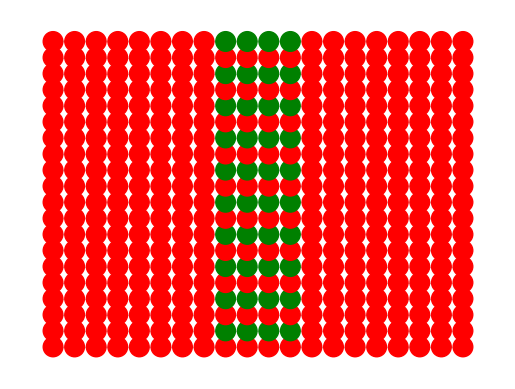

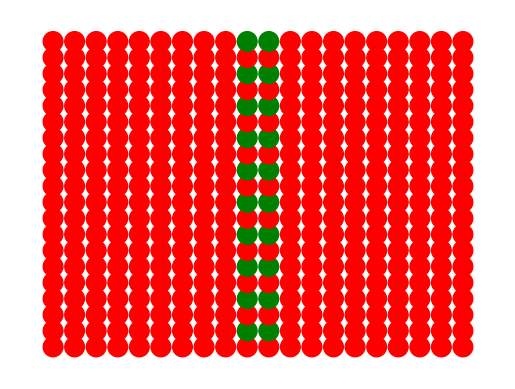

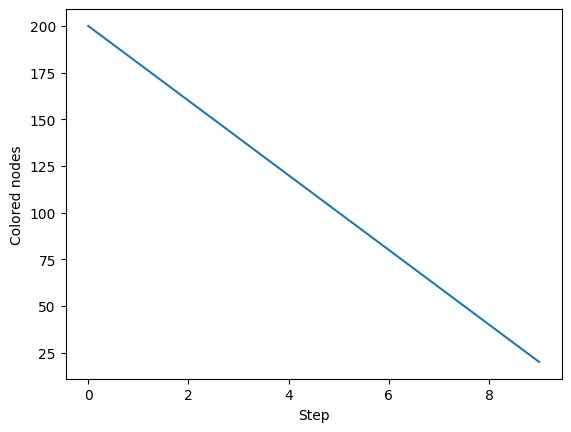

In [62]:

counts = []
state = {node: i % 2 for i, node in enumerate(G.nodes())}
print(state)
# state[(8,9)] = 1
# state[(9,9)] = 1
# state[(10,9)] = 1
# state[(9,8)] = 1
# state[(9,10)] = 1
# state[(9,11)] = 1
# state[(9,12)] = 1
for i in range(10):
    draw_state(G, state)
    counts.append(count_colored_nodes(G, state))
    state = update_state(G, state)
    # draw_state(G, state)
plot_colored_nodes(counts)